# Practica 5: Astronomia Galactica

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\juang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\juang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\juang\AppData\Local\Temp/ipykernel_11256/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv(r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Astronomia Galactica\result.csv")
df.shape

(118218, 14)

In [4]:
df = df.dropna(subset=['Plx'])
df.shape

(117955, 14)

In [5]:
df = df.sort_values(by='Plx', ascending=False)
# Print or use the sorted DataFrame as needed
df=df.head(50)
df.shape
df.head()

,HIP,RAhms,DEdms,Vmag,RAICRS,DEICRS,Plx,pmRA,pmDE,e_Plx,B-V,Notes,_RA_icrs,_DE_icrs
70826,70890,14 29 47.75,-62 40 52.9,11.01,217.448948,-62.681352,772.33,-3775.64,768.16,2.42,1.807,,217.428953,-62.679484
71615,71681,14 39 39.39,-60 50 22.1,1.35,219.914128,-60.839471,742.12,-3600.35,952.11,1.40,0.900,D,219.896170,-60.837156
71618,71683,14 39 40.90,-60 50 06.5,-0.01,219.920410,-60.835147,742.12,-3678.19,481.84,1.40,0.710,D,219.902066,-60.833975
87859,87937,17 57 48.97,+04 40 05.8,9.54,269.454023,4.668288,549.01,-797.84,10326.93,1.58,1.570,,269.452077,4.693388
53993,54035,11 03 20.61,+35 58 53.3,7.49,165.835884,35.981464,392.40,-580.20,-4767.09,0.91,1.502,,165.834142,35.969878


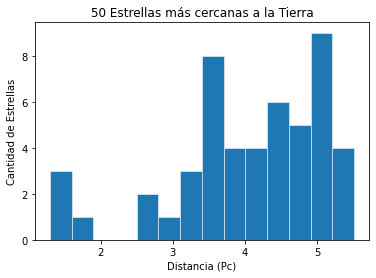

In [6]:
result_list = [1000 / i for i in df['Plx']]

plt.hist(result_list, bins=14, linewidth=0.5, edgecolor="white")
#plt.grid(True)
plt.xlabel("Distancia (Pc)")
plt.ylabel("Cantidad de Estrellas")
plt.title("50 Estrellas más cercanas a la Tierra")
plt.show()

In [7]:
from scipy.optimize import curve_fit

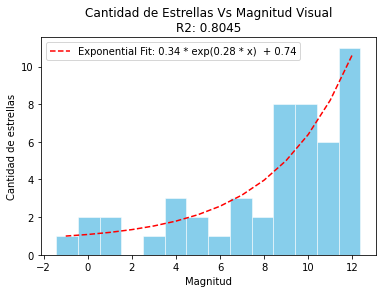

In [8]:
mag= df['Vmag']
plt.hist(mag, bins=14, linewidth=0.5, edgecolor="white", color="skyblue")
counts, bin_edges = np.histogram(df['Vmag'], bins=14)
x=np.linspace(-1,12,14)
def exponential_func(x, a, b,c):
    return (a * np.exp(b * x))+c
params, covariance = curve_fit(exponential_func, x, counts)
fit_values= exponential_func(x, *params)
plt.plot(x, fit_values, linestyle='--', color='r', label=f'Exponential Fit: {params[0]:.2f} * exp({params[1]:.2f} * x)  + {params[2]:.2f}')
plt.legend()
residuals = counts - fit_values
ss_residual = np.sum(residuals**2)
ss_total = np.sum((counts - np.mean(counts))**2)
r2 = 1 - (ss_residual / ss_total)
plt.xlabel("Magnitud")
plt.ylabel("Cantidad de estrellas")
plt.title('Cantidad de Estrellas Vs Magnitud Visual\nR2: {:.4f}'.format(r2))
plt.show()


In [9]:
sum(counts[:8]) #Hasta magnitud 6

12

In [10]:
from matplotlib import cm

Text(0.5, 1.0, 'Indice de Color Vs Estrellas')

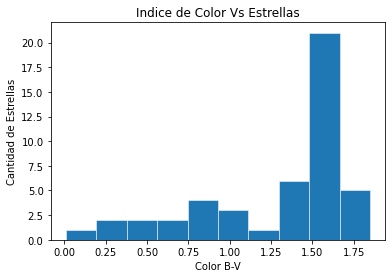

In [11]:
color= df['B-V']
plt.hist(color, bins=10, linewidth=0.5, edgecolor="white")
plt.xlabel("Color B-V")
plt.ylabel("Cantidad de Estrellas")
plt.title("Indice de Color Vs Estrellas")

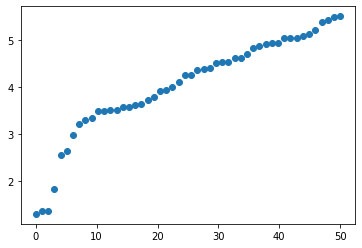

In [12]:
ind= np.linspace(0,50,50)
plt.scatter(ind, result_list)

In [13]:
new_df = []
for i in range(len(df) - 1):
    current_row = df.iloc[i]
    next_row = df.iloc[i + 1]
    # Check if the difference in "Plx" is less than 0.1
    if abs(current_row['Plx'] - next_row['Plx']) < 0.5:
        # Append both rows to the list
        new_df.extend([current_row, next_row])

# Create the final DataFrame by concatenating the list of DataFrames
df_binarias = pd.concat(new_df, axis=1).T.reset_index(drop=True)
print(df_binarias)

       HIP        RAhms        DEdms   Vmag      RAICRS     DEICRS     Plx  \
0    71681  14 39 39.39  -60 50 22.1   1.35  219.914128 -60.839471  742.12   
1    71683  14 39 40.90  -60 50 06.5  -0.01   219.92041 -60.835147  742.12   
2    91768  18 42 48.22  +59 37 33.7   8.94  280.700906  59.626016  280.28   
3     1475  00 18 20.54  +44 01 19.0   8.09    4.585591  44.021956  280.27   
4    86162  17 36 26.41  +68 20 32.0   9.15  264.110027  68.342227  220.85   
5    85523  17 28 39.46  -46 53 35.0   9.38  262.164404 -46.893052  220.43   
6   114110  23 06 38.89  -14 52 20.6  12.24  346.662032 -14.872397  216.52   
7    57367  11 45 39.26  -64 50 26.4   11.5  176.413598 -64.840674   216.4   
8    82725  16 54 32.15  -62 24 13.5  11.72  253.633948 -62.403741  203.01   
9    85605  17 29 36.19  +24 39 11.6  11.39  262.400787  24.653221  202.69   
10   85605  17 29 36.19  +24 39 11.6  11.39  262.400787  24.653221  202.69   
11  106440  21 33 34.02  -49 00 25.3   8.66  323.391734 -49.0070

In [22]:
eli=[2,3,6,7,10,11,12,13,14,15]
df_filtered = df_binarias.drop(eli)
df_filtered

,HIP,RAhms,DEdms,Vmag,RAICRS,DEICRS,Plx,pmRA,pmDE,e_Plx,B-V,Notes,_RA_icrs,_DE_icrs
0,71681,14 39 39.39,-60 50 22.1,1.35,219.914128,-60.839471,742.12,-3600.35,952.11,1.4,0.9,D,219.89617,-60.837156
1,71683,14 39 40.90,-60 50 06.5,-0.01,219.92041,-60.835147,742.12,-3678.19,481.84,1.4,0.71,D,219.902066,-60.833975
4,86162,17 36 26.41,+68 20 32.0,9.15,264.110027,68.342227,220.85,-320.47,-1269.55,0.92,1.505,,264.107916,68.339141
5,85523,17 28 39.46,-46 53 35.0,9.38,262.164404,-46.893052,220.43,573.32,-879.84,1.63,1.553,,262.166443,-46.89519
8,82725,16 54 32.15,-62 24 13.5,11.72,253.633948,-62.403741,203.01,254.79,173.56,29.27,NaN,D,253.635285,-62.40332
9,85605,17 29 36.19,+24 39 11.6,11.39,262.400787,24.653221,202.69,97.33,348.92,39.48,1.101,D,262.401047,24.65407
